<a href="https://colab.research.google.com/github/amitaucs/tensorflowexplore/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-alpha
import tensorflow as tf


     |████████████████████████████████| 79.9MB 126kB/s 
     |████████████████████████████████| 3.0MB 29.9MB/s 
     |████████████████████████████████| 419kB 37.3MB/s 
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
print(tf.__version__)

2.0.0-alpha0


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data = load_breast_cancer()

In [5]:
type(data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target.shape

(569,)

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_test,X_train,y_test,y_train = train_test_split(data.data,data.target,test_size = 0.33)

In [0]:
N, D = X_train.shape

In [14]:
N

188

In [15]:
D

30

In [16]:
X_train

array([[1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
        6.825e-02],
       [1.684e+01, 1.946e+01, 1.084e+02, ..., 8.436e-02, 2.527e-01,
        5.972e-02],
       [1.277e+01, 2.141e+01, 8.202e+01, ..., 4.773e-02, 2.179e-01,
        6.871e-02],
       ...,
       [1.955e+01, 2.321e+01, 1.289e+02, ..., 1.825e-01, 2.576e-01,
        7.602e-02],
       [1.057e+01, 2.022e+01, 7.015e+01, ..., 1.465e-01, 2.597e-01,
        1.200e-01],
       [1.611e+01, 1.805e+01, 1.051e+02, ..., 1.216e-01, 2.792e-01,
        8.158e-02]])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [18]:
X_train

array([[-0.75861728, -0.51882731, -0.81553862, ..., -1.16494696,
        -0.21134301, -0.75202897],
       [ 0.76632467,  0.01503004,  0.6781326 , ..., -0.50877082,
        -0.49396886, -1.17154681],
       [-0.431844  ,  0.45060402, -0.45740189, ..., -1.0846149 ,
        -0.97609533, -0.7294055 ],
       ...,
       [ 1.56412248,  0.85267231,  1.56056084, ...,  1.03404487,
        -0.42608324, -0.36988904],
       [-1.07950275,  0.1847922 , -0.96834937, ...,  0.46810474,
        -0.3969894 ,  1.7931115 ],
       [ 0.55141972, -0.29992346,  0.53608317, ...,  0.07666281,
        -0.12683233, -0.09644013]])

In [19]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=100)



Train on 188 samples, validate on 381 samples
Epoch 1/100
188/188 [==============================] - 0s 990us/sample - loss: 1.6405 - accuracy: 0.1383 - val_loss: 1.6857 - val_accuracy: 0.1181
Epoch 2/100
188/188 [==============================] - 0s 144us/sample - loss: 1.5710 - accuracy: 0.1436 - val_loss: 1.6152 - val_accuracy: 0.1234
Epoch 3/100
188/188 [==============================] - 0s 123us/sample - loss: 1.5042 - accuracy: 0.1436 - val_loss: 1.5452 - val_accuracy: 0.1260
Epoch 4/100
188/188 [==============================] - 0s 131us/sample - loss: 1.4360 - accuracy: 0.1436 - val_loss: 1.4774 - val_accuracy: 0.1339
Epoch 5/100
188/188 [==============================] - 0s 132us/sample - loss: 1.3736 - accuracy: 0.1596 - val_loss: 1.4101 - val_accuracy: 0.1444
Epoch 6/100
188/188 [==============================] - 0s 150us/sample - loss: 1.3097 - accuracy: 0.1702 - val_loss: 1.3453 - val_accuracy: 0.1549
Epoch 7/100
188/188 [==============================] - 0s 130us/sample -

In [20]:
print("Training score", model.evaluate(X_train,y_train))
print("Test score", model.evaluate(X_test,y_test))

188/188 [==============================] - 0s 71us/sample - loss: 0.2025 - accuracy: 0.9521
Training score [0.20254482170368762, 0.95212764]
381/381 [==============================] - 0s 42us/sample - loss: 0.1987 - accuracy: 0.9711
Test score [0.1987215235164472, 0.9711286]


In [21]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

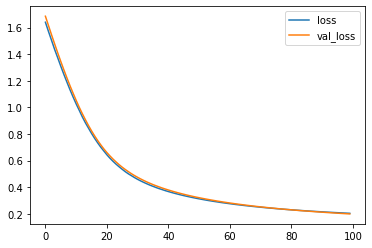

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label ='val_loss')
plt.legend()

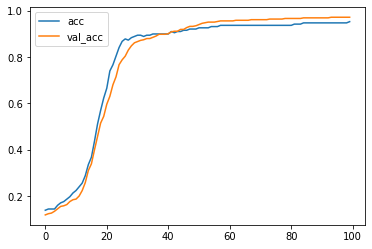

In [23]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label ='val_acc')
plt.legend()

In [24]:
P = model.predict(X_test)
print(P)

[[1.93881691e-02]
 [9.78819370e-01]
 [3.47319543e-01]
 [7.64894485e-01]
 [7.90545344e-03]
 [9.72478032e-01]
 [1.52295619e-01]
 [3.32800567e-01]
 [4.19182479e-02]
 [8.78982425e-01]
 [2.48500109e-02]
 [8.39140773e-01]
 [1.48045063e-01]
 [1.35989189e-02]
 [8.83478284e-01]
 [8.47890675e-01]
 [8.47430706e-01]
 [4.03297096e-01]
 [3.29157412e-02]
 [8.51904452e-01]
 [6.16551518e-01]
 [3.60169142e-01]
 [8.50664735e-01]
 [7.36782908e-01]
 [8.92561734e-01]
 [2.98945606e-02]
 [8.28504682e-01]
 [9.30981219e-01]
 [2.82317162e-01]
 [2.94933379e-01]
 [1.45688415e-01]
 [4.48426902e-02]
 [9.10046101e-01]
 [3.64873946e-01]
 [3.77923608e-01]
 [3.72025371e-03]
 [2.90189505e-01]
 [6.15131974e-01]
 [6.79564178e-01]
 [2.06995606e-02]
 [9.45439160e-01]
 [1.25248134e-02]
 [8.92548203e-01]
 [8.85813177e-01]
 [9.14559126e-01]
 [9.34485495e-02]
 [6.75666332e-03]
 [8.68873835e-01]
 [3.91647249e-01]
 [7.70855904e-01]
 [8.81463051e-01]
 [5.69687784e-01]
 [1.24629200e-01]
 [9.52134848e-01]
 [2.37274170e-03]
 [5.062336

In [25]:
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0.

In [26]:
print("Manually canculation accuracy :", np.mean( P == y_test))
print("Evaluated by model :", model.evaluate(X_test,y_test))

Manually canculation accuracy : 0.9711286089238845
381/381 [==============================] - 0s 51us/sample - loss: 0.1987 - accuracy: 0.9711
Evaluated by model : [0.1987215235164472, 0.9711286]


In [0]:
#Save model
model.save('linearclassification.h5')/content/linearclassification.h5

In [28]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Nov  4 06:46 linearclassification.h5
drwxr-xr-x 1 root root 4.0K Oct 25 16:58 sample_data


In [29]:
model = tf.keras.models.load_model('/content/linearclassification.h5')
print(model.layers)
model.evaluate(X_test, y_test)

381/381 [==============================] - 0s 119us/sample - loss: 0.1987 - accuracy: 0.9711


[0.1987215235164472, 0.9711286]

In [0]:
from google.colab import files
files.download('/content/linearclassification.h5')